In [277]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# ALL GESTOS

In [278]:
path = "data_train.csv"

df = pd.read_csv(path)

In [279]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [204]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [205]:
print(df.shape)

(2126, 16)


Obtenemos el número de gestos realizados, `label`

In [206]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación

Observamos que tipos de datos tenemos en cada columna de la base de datos

In [207]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [280]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [209]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688


In [210]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [211]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,11239.645352,6576.862323,7966.155007,14098.447801,8909.567230,8931.396506,8589.388427,7254.389568,60.476625,166.632142,160.137008,0.044677,0.017014,0.016057
std,7855.408927,5429.219195,5806.634702,4205.584819,7504.540379,3000.422613,5910.472656,12452.957919,29.096948,47.371935,48.451439,0.098520,0.023332,0.024986
min,29.660622,36.353449,104.558167,5007.550447,21.727499,416.567313,26.915714,32.749265,0.895213,1.599858,1.634041,0.001553,0.001135,0.001054
25%,6678.383686,1686.144308,2673.984097,9475.253731,3607.409825,6681.980555,4191.104787,2414.945454,41.575748,153.968853,135.521008,0.009040,0.005559,0.005535
50%,10442.188830,5687.961150,8607.866853,14166.747215,5173.648533,8809.246319,6993.944416,4883.146500,54.831927,175.487314,164.118736,0.015903,0.008990,0.009559
75%,16449.714040,10398.949144,12076.046571,17259.819397,17166.643452,12126.593503,13618.250516,7068.200828,74.945095,199.089590,189.795975,0.034112,0.018660,0.018804
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,18816.077841,27715.941564,156087.716611,155.544325,246.540560,256.787833,0.972397,0.308125,0.746823


Observamos si las salidas estan balanceadas

In [212]:
y_df.value_counts()

label
2    305
6    305
3    304
5    304
4    303
1    303
0    302
Name: count, dtype: int64

Observamos si hay valores nulos

In [213]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [214]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [215]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [216]:
y_df.isnull().any()

False

In [217]:
y_df.isnull().sum()

0

In [218]:
y_df.isnull().sum() / len(y_df) * 100

0.0

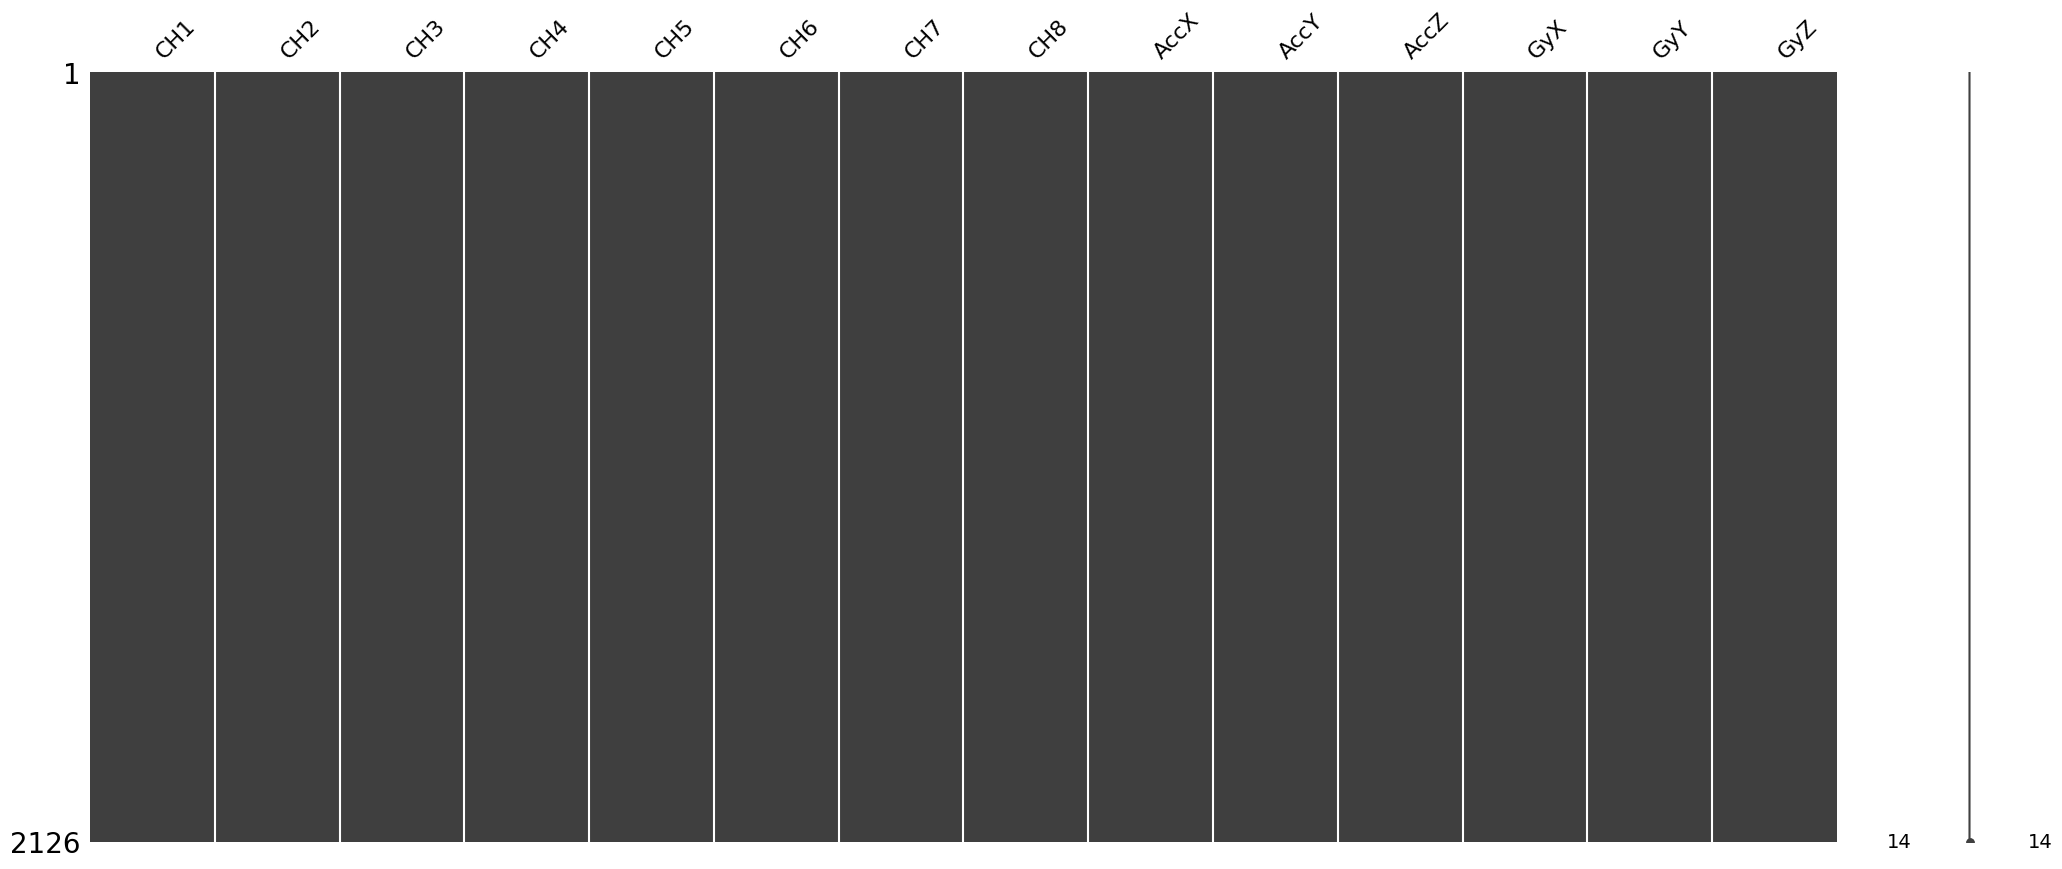

In [219]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

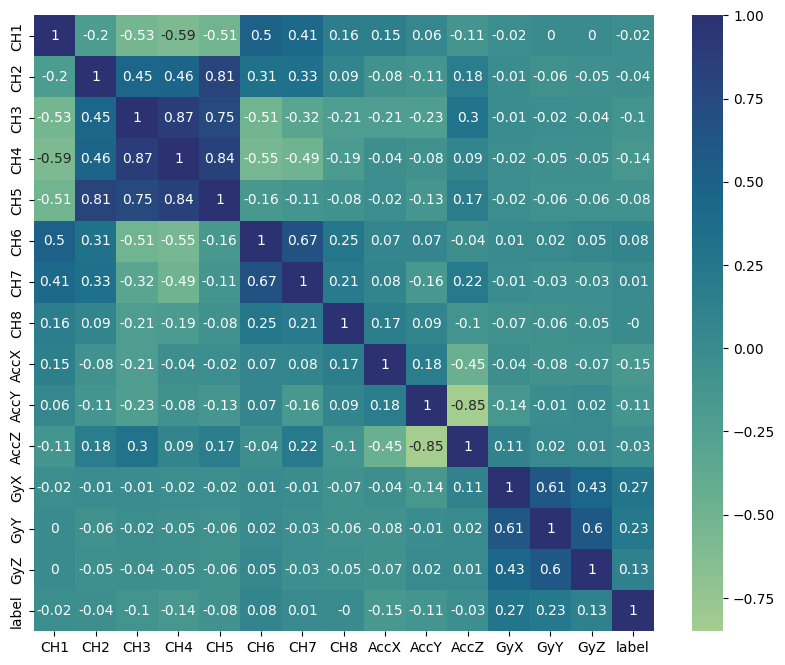

In [220]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [281]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [282]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [283]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [284]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [285]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## LOGISTIC REGRESSION

In [286]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [287]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200, 225, 250],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [288]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
53,125,l2,lbfgs,0.505325,0.028094,0.534938,0.007886
44,100,l2,newton-cg,0.504804,0.029723,0.536957,0.006560
36,75,l2,newton-cg,0.504804,0.029723,0.537247,0.006888
85,225,l2,lbfgs,0.504736,0.027607,0.535218,0.007216
0,1,None,newton-cg,0.504208,0.028174,0.537551,0.005785


In [289]:
logistic_grid.best_params_

{'classifier__C': 125,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [290]:
logistic_grid.best_score_

0.5053252174966122

In [291]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=125, class_weight='balanced',
                                    random_state=33))])


In [292]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 1.25363141  0.22002062  1.37100546  0.71924007  0.84819379 -1.0956588
 -3.31643257]
Coeficientes: [('CH1', -1.6231480814862431), ('CH2', 0.21452558219162604), ('CH3', 0.312601205559033), ('CH4', 2.4193058631391073), ('CH5', -2.9889611422100653), ('CH6', 0.4591026062299843), ('CH7', 1.1703372165781862), ('CH8', 0.37703441324691267), ('AccX', 0.6810657930895279), ('AccY', 1.5944962086388805), ('AccZ', 1.6586232892652422), ('GyX', -2.9256628727853644), ('GyY', 0.2057986674872725), ('GyZ', 0.7132119548288973), ('TimeStamp', 2.6028534319026018), ('label', -0.3905549554194513)]
Accuracy de test: 0.5352112676056338


In [293]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [294]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.42      0.67      0.52        61
           1       0.37      0.39      0.38        64
           2       0.50      0.35      0.41        65
           3       0.40      0.36      0.38        67
           4       0.41      0.33      0.37        52
           5       0.83      0.86      0.85        58
           6       0.89      0.81      0.85        59

    accuracy                           0.54       426
   macro avg       0.55      0.54      0.54       426
weighted avg       0.54      0.54      0.53       426



In [295]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.5352112676056338


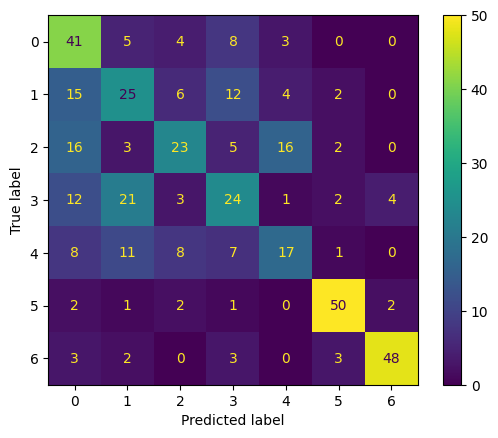

In [296]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

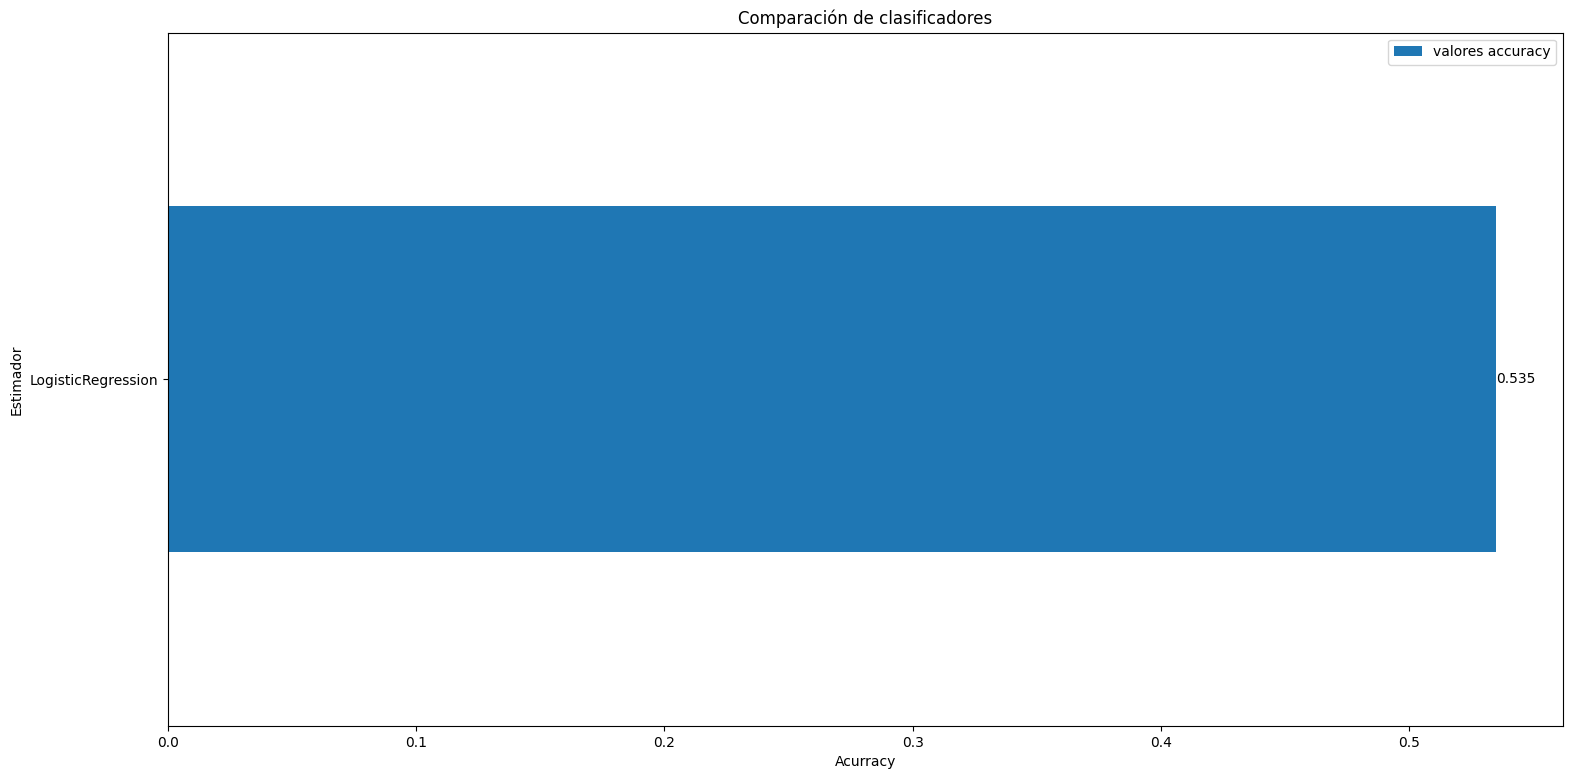

In [297]:
df_comparacion = pd.DataFrame({
                    'estimador': ['LogisticRegression'],
                    'valores accuracy': [ logistic_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`. 

In [298]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [ ]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 125,
        penalty = 'l2',
        solver = 'lbfgs',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('modelo_LR.pkl', 'wb'))